In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import plotly.io as pio

### Color pallets ""

In [4]:
fig.update_xaxes(tickangle=45)

NameError: name 'fig' is not defined

In [2]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./Heatmap.csv")

# Set the variables as the y-axis and the first column as the x-axis
y = data.columns[2:17]
x = data.iloc[:, 0]

# Convert DataFrame to matrix and transpose it
data_matrix = data.iloc[:, 2:17].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, y=y, x=x, labels={'y':'Physio-Biochemical Parameters', 'x':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Rotate the tick labels on the y-axis
fig.update_yaxes(tickangle=-30)

# Show the heatmap
fig.show()

# Save the heatmap as PNG
# pio.write_image(fig, "heatmap.png", format="png", scale=1, width=400, height=800)

In [5]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./Heatmap 2.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[2:19]
y = data.iloc[:, 0]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 2:19].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()
# fig.write_html('./heatmap.png')


In [ ]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./Heatmap 2.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[2:19]
y = data.iloc[:, 0]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 2:19].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()
# fig.write_html('./heatmap.png')


In [4]:

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./Heatmap 2.csv")

# Set the variables as the x-axis and the first column as the y-axis
x = data.columns[2:19]
y = data.iloc[:, 0]

# Convert DataFrame to matrix
data_matrix = data.iloc[:, 2:19].values

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Create the heatmap using plotly.express
fig = px.imshow(data_matrix_normalized, x=x, y=y, labels={'x':'Physio-Biochemical Parameters', 'y':'Light-Salt Concentrations with Days'}, color_continuous_scale='magma', aspect='auto')

# Show the heatmap
fig.show()


# # Save the heatmap as JPEG
# pio.write_image(fig, "heatmap.jpg", format="jpeg", scale=1, width=400, height=300)

# # Save the heatmap as PNG
pio.write_image(fig, "heatmap.png", format="png", scale=1, width=600, height=400)


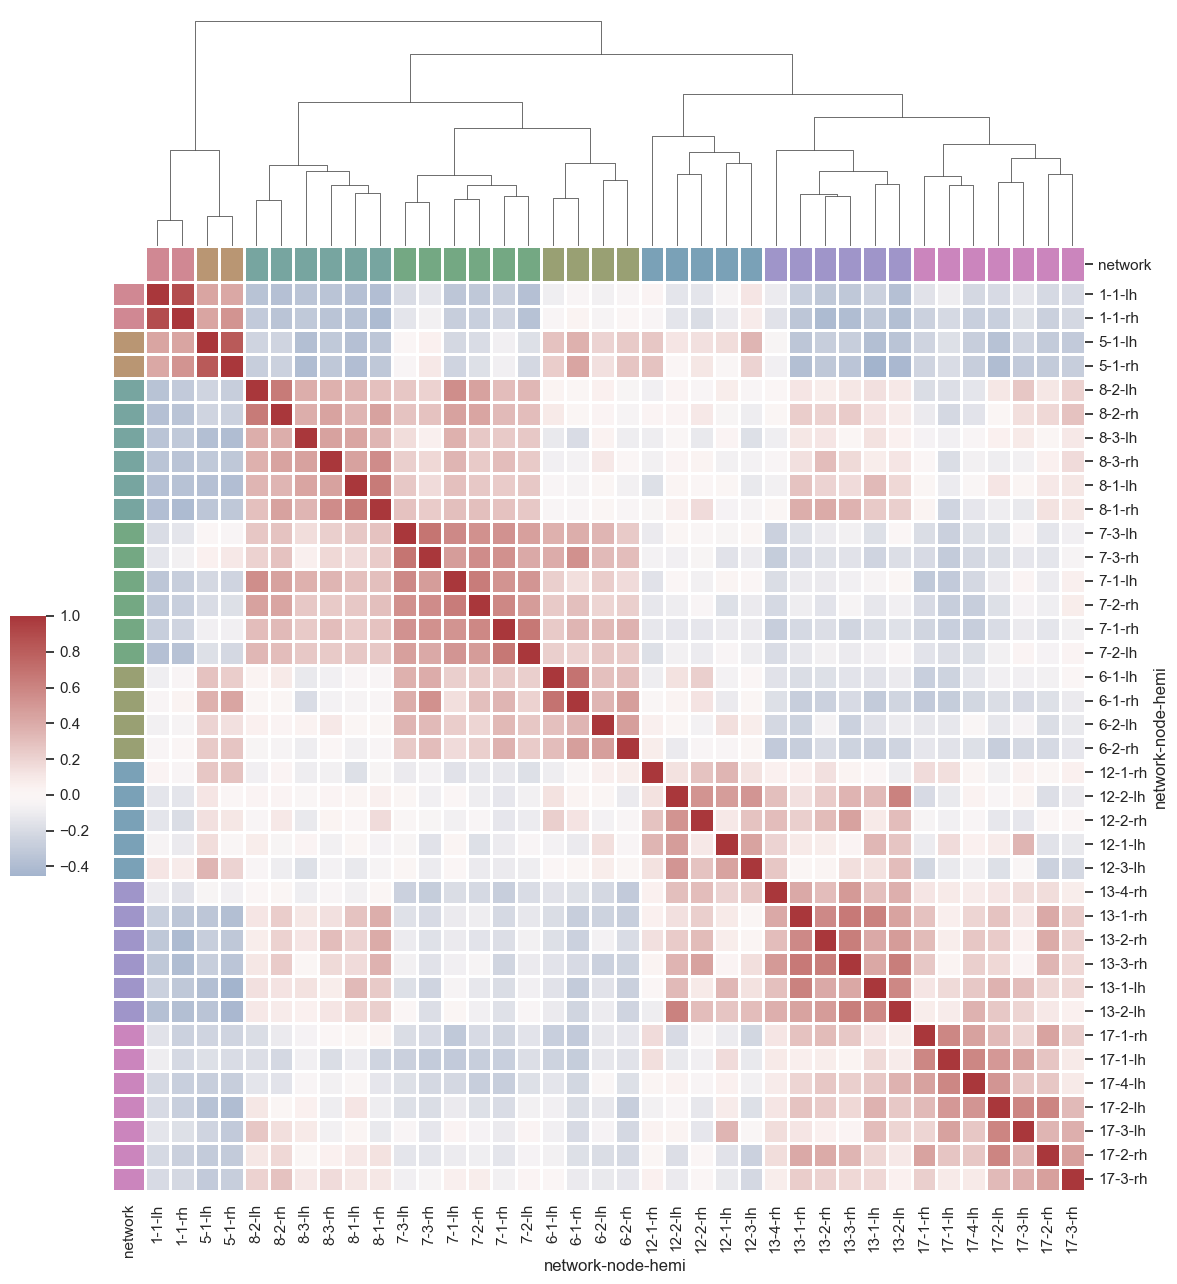

In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

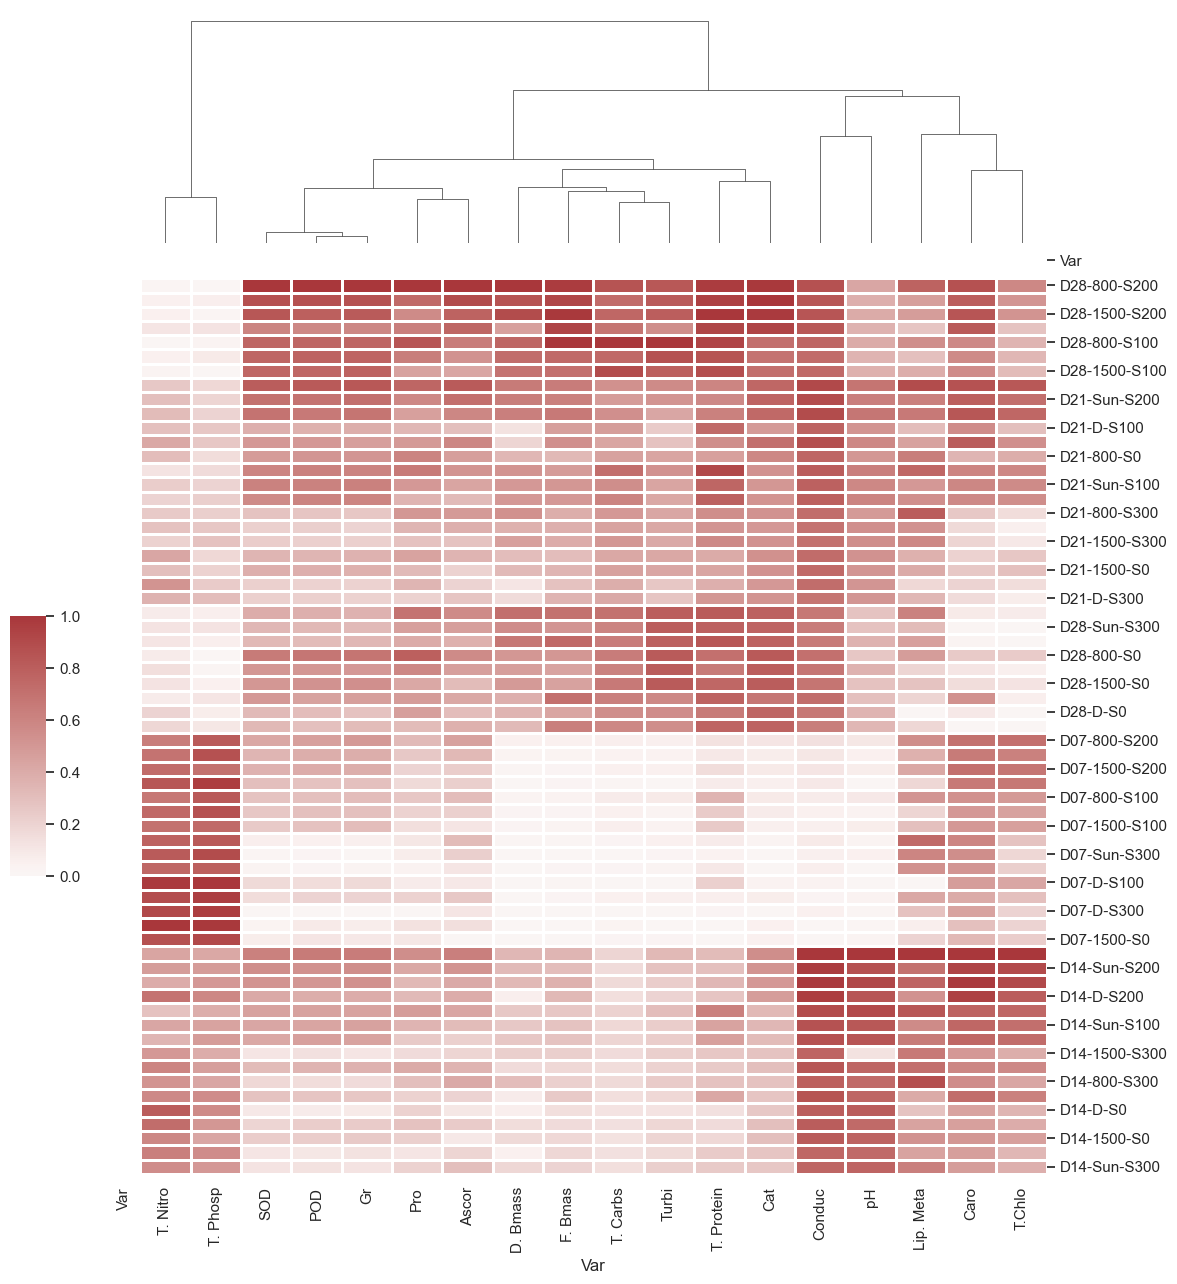

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
sns.set_theme()

# Load your dataset
df = pd.read_csv("./Heatmap.csv")

# Set the variables as the y-axis and the first column as the x-axis
y = df.columns[2:65]
x = df.iloc[:, 0]

# Convert DataFrame to matrix and transpose it
data_matrix = df.iloc[:, 2:65].values.T

# Normalize the data_matrix
scaler = MinMaxScaler()
data_matrix_normalized = scaler.fit_transform(data_matrix)

# Convert the normalized matrix back to DataFrame
df_normalized = pd.DataFrame(data_matrix_normalized, columns=x, index=y)

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, range(2,65)), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df_normalized, center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

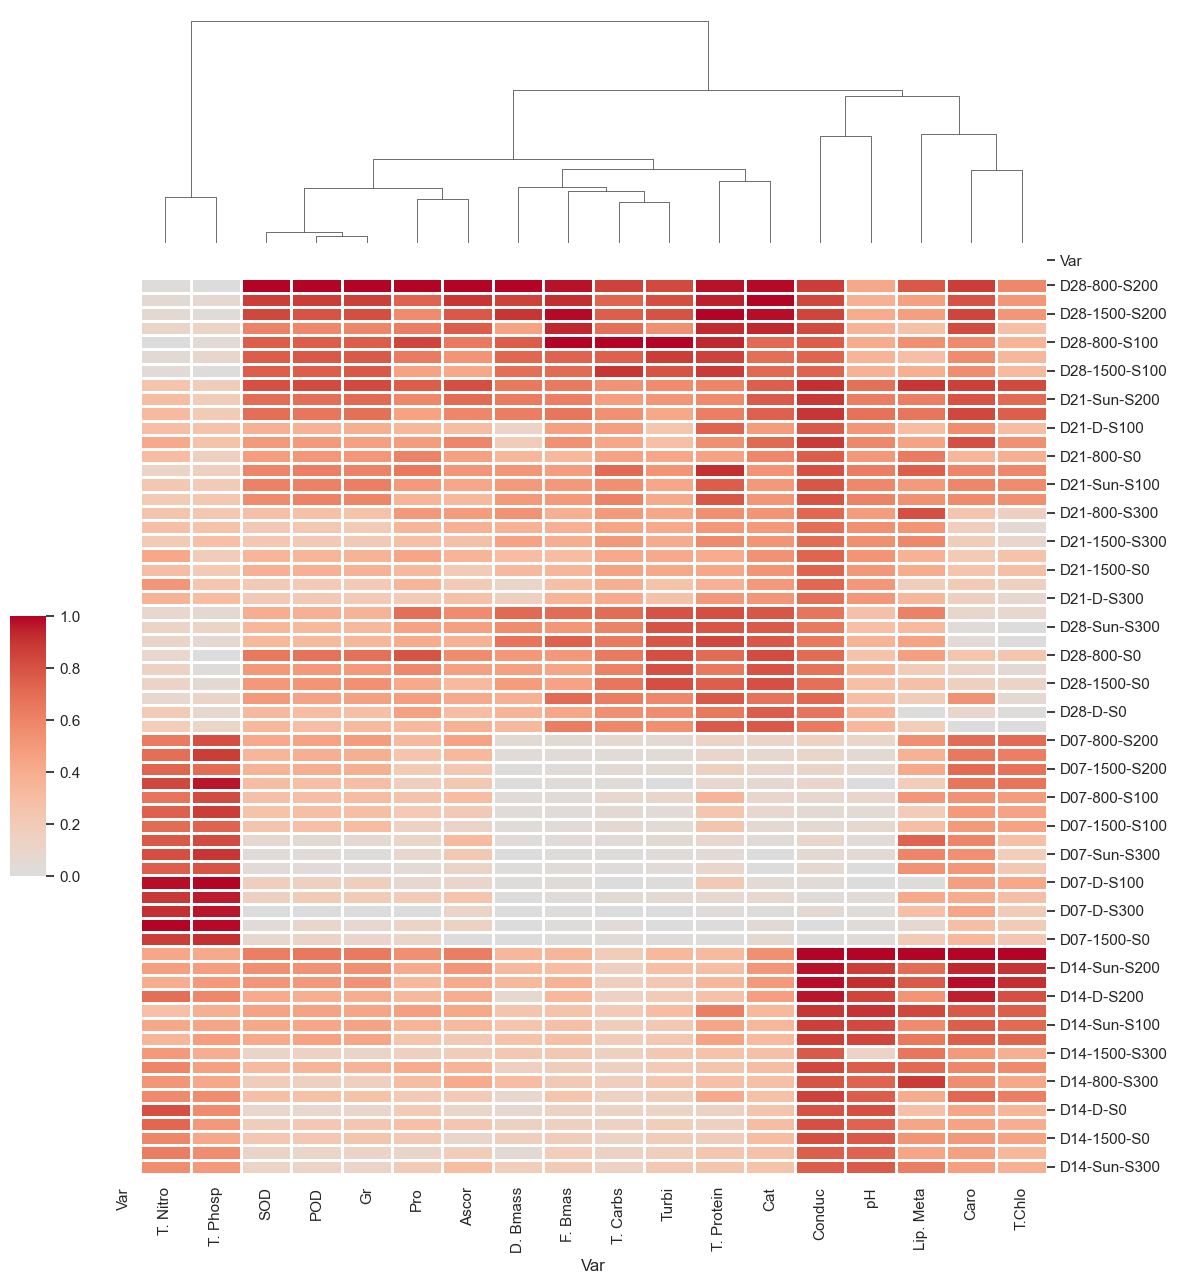

In [3]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=1)  # Increase saturation to 1
network_lut = dict(zip(map(str, range(2,65)), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot with the "coolwarm" palette
g = sns.clustermap(df_normalized, center=0, cmap="coolwarm",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

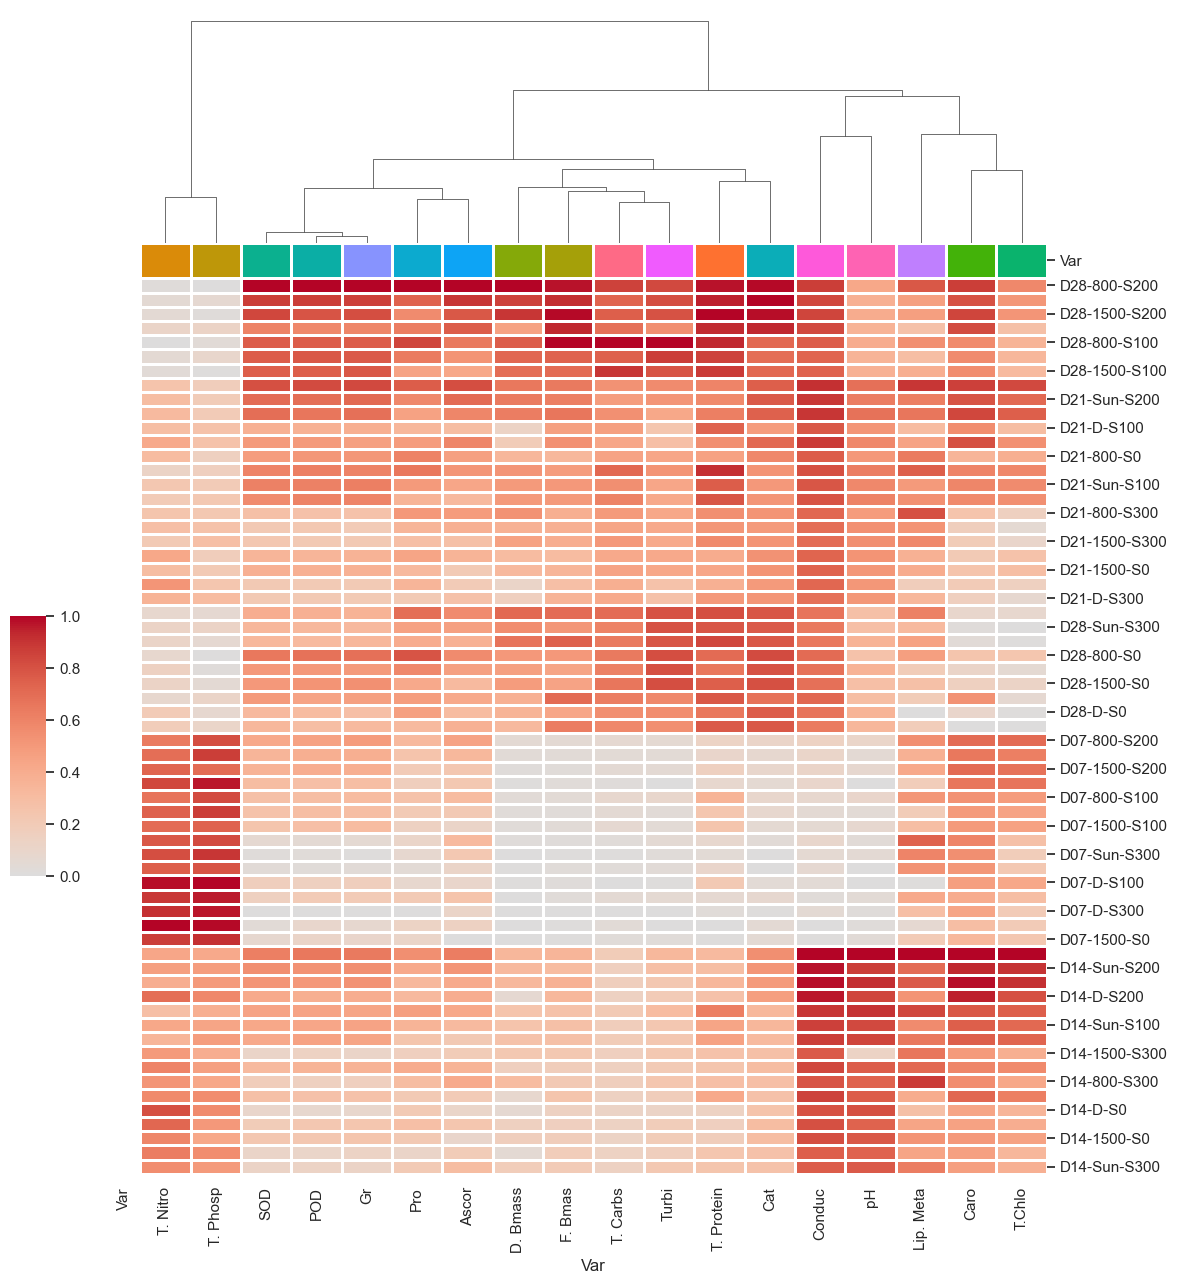

In [4]:
# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(18, s=1)  # Create a palette with 18 colors
network_lut = dict(zip(map(str, df_normalized.columns), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df_normalized.columns
network_colors = pd.Series(networks, index=df_normalized.columns).map(network_lut)

# Draw the full plot with the "coolwarm" palette
g = sns.clustermap(df_normalized, center=0, cmap="coolwarm",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

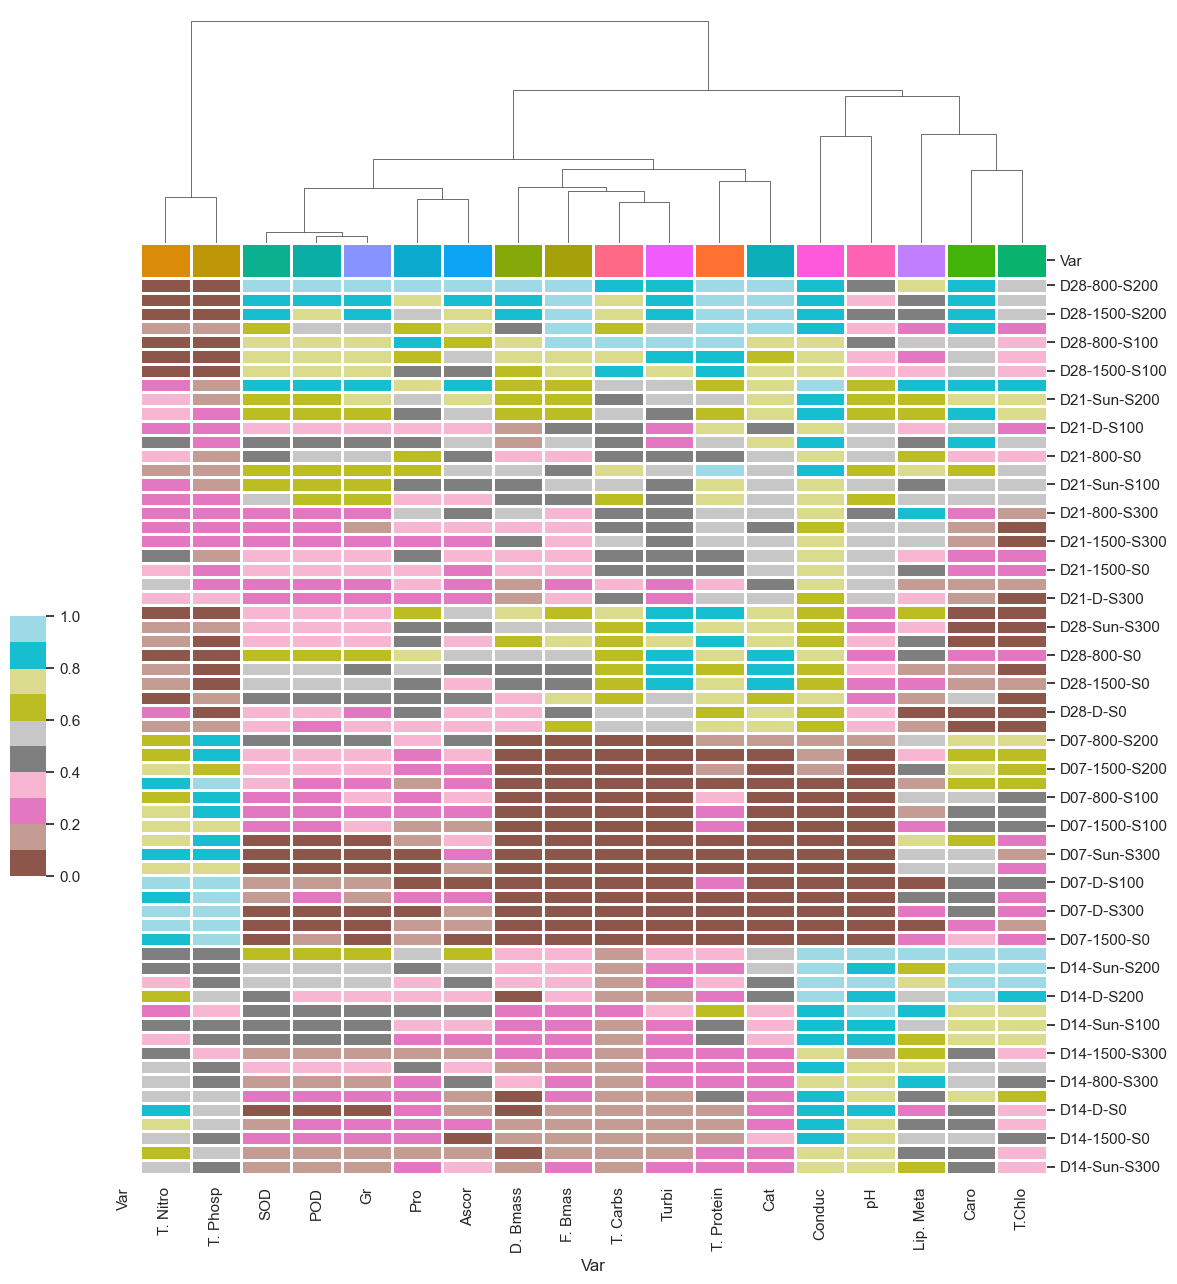

In [5]:
import matplotlib.pyplot as plt

# Create a colormap with multiple colors
cmap = plt.get_cmap("tab20")

# Draw the full plot with the new colormap
g = sns.clustermap(df_normalized, center=0, cmap=cmap,
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()